In [ ]:
import torch
pytorch_version = f"torch-{torch.__version__}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 97.2 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 56.5 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.0 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.1/947.1 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00


In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 44.1 MB/s eta 0:00:00


In [ ]:
import rdkit
from torch_geometric.datasets import MoleculeNet

data=MoleculeNet(root='.',name='ESOL')
data

Processing...
Done!


ESOL(1128)

In [ ]:
print(data.num_features)
print(data.num_classes)
print(data.len)
print(data[0])

9
734
<bound method InMemoryDataset.len of ESOL(1128)>
Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])


/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


In [ ]:
print(data[0].num_nodes)
print(data[0].num_edges)

32
68


In [ ]:
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv, global_mean_pool,TopKPooling
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

class gnn(torch.nn.Module):
  def __init__(self):
    super(gnn,self).__init__()
    torch.manual_seed(69)

    self.l1=GCNConv(data.num_features,64)
    self.c1=GCNConv(64,64)
    self.c2=GCNConv(64,64)
    self.c3=GCNConv(64,64)

    self.c4=Linear(128,1)

  def forward(self,x,edge_index,batch_index):
    h=self.l1(x,edge_index)
    h=F.relu(h)
    h=self.c1(h,edge_index)
    h=F.relu(h)
    h=self.c2(h,edge_index)
    h=F.relu(h)
    h=self.c3(h,edge_index)
    h=F.relu(h)
    h=F.dropout(h,p=0.2,training=self.training)

    h=torch.cat([gmp(h,batch_index),gap(h,batch_index)],dim=1)

    out=self.c4(h)
    return out,h



In [ ]:
model=gnn()
print(model)
print(sum(p.numel() for p in model.parameters()))

gnn(
  (l1): GCNConv(9, 64)
  (c1): GCNConv(64, 64)
  (c2): GCNConv(64, 64)
  (c3): GCNConv(64, 64)
  (c4): Linear(in_features=128, out_features=1, bias=True)
)
13249


In [ ]:
from torch_geometric.data import DataLoader

lf=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=5e-4,weight_decay=5e-3)

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

data_size=len(data)
gpb=64
train_data=DataLoader(data[0:int(data_size*0.8)],batch_size=gpb,shuffle=True)
test_data=DataLoader(data[int(data_size*0.8):],batch_size=gpb,shuffle=True)

def train(data):
  for batch in train_data:
    batch.to(device)
    optimizer.zero_grad()
    pred,embedding=model(batch.x.float(),batch.edge_index,batch.batch)
    loss=lf(pred,batch.y.float())
    loss.backward()
    optimizer.step()
  return loss,embedding

losses=[]

for epoch in range(2001):
  loss,h=train(data)
  losses.append(loss)
  if epoch%100==0:
    print(f' {epoch} =>  {loss}')

 0 =>  2.32346248626709
 100 =>  1.1080279350280762
 200 =>  5.282131671905518
 300 =>  1.189361572265625
 400 =>  1.003931999206543
 500 =>  0.9825228452682495
 600 =>  0.2724105715751648
 700 =>  0.3485342264175415
 800 =>  0.13313809037208557
 900 =>  0.36642134189605713
 1000 =>  0.5170117616653442
 1100 =>  0.45798832178115845
 1200 =>  0.39561042189598083
 1300 =>  0.34358105063438416
 1400 =>  0.5000596046447754
 1500 =>  0.3348814845085144
 1600 =>  0.2685919404029846
 1700 =>  0.4302537441253662
 1800 =>  0.4329962134361267
 1900 =>  0.47296762466430664
 2000 =>  0.17356806993484497


<Axes: >

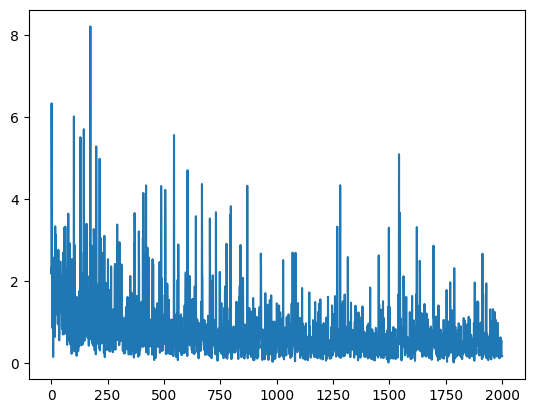

In [ ]:
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i,l in enumerate(losses_float)]
plt = sns.lineplot(x=loss_indices, y=losses_float)
plt

In [ ]:
import pandas as pd

# Analyze the results for one batch
test_batch = next(iter(test_data))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,-2.740,-2.833223
1,-0.850,-0.779670
2,0.100,-0.279436
3,-2.180,-2.168493
4,-1.970,-1.016552
...,...,...
59,-4.554,-3.661436
60,-2.218,-2.615291
61,-4.445,-5.930369
62,-3.190,-3.387490


<Axes: xlabel='y_real', ylabel='y_pred'>

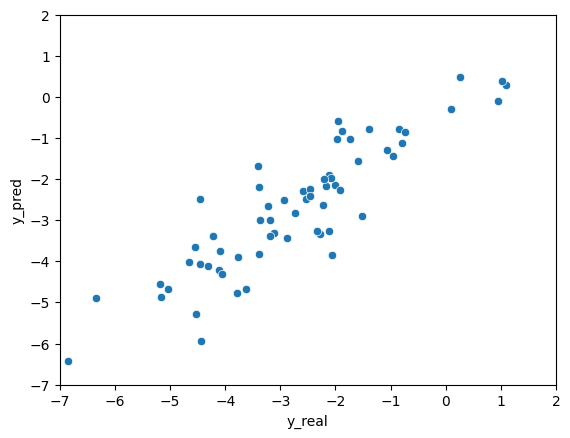

In [ ]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt